In [1]:
import pid_df
import matplotlib.pyplot as plt

pid_ep = pid_df.pid_df('EpDF_DataFrame.csv','ep',1.0)
pid_ep.add_df('PipDF_DataFrame.csv','pip',0.1)

feature_list = ['E1E9_FCAL','E9E25_FCAL','dE_BCAL','dE_BCAL_L2','dE_BCAL_L3','dE_BCAL_L4','dE_BCAL_preshower','dE_FCAL','dEdx_ST','p','sigLong_BCAL','sigTrans_BCAL','sumU_FCAL','sumV_FCAL','theta']
pid_ep.set_features(feature_list,'particle_id')

print(len(pid_ep.pid))

pid_ep.rf_model('ss')

436370
Scaling and splitting the data.


C:\Users\sebas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
pid_ep.predict()
pid_ep.roc_auc()
fig,ax = plt.subplots(figsize=(20,15))
pid_ep.roc_curve()
print(pid_ep.lr_auc)
print(pid_ep.accuracy)
fig.savefig('rf_first_pass.pdf')

0.9832048190721241
0.963902358538128


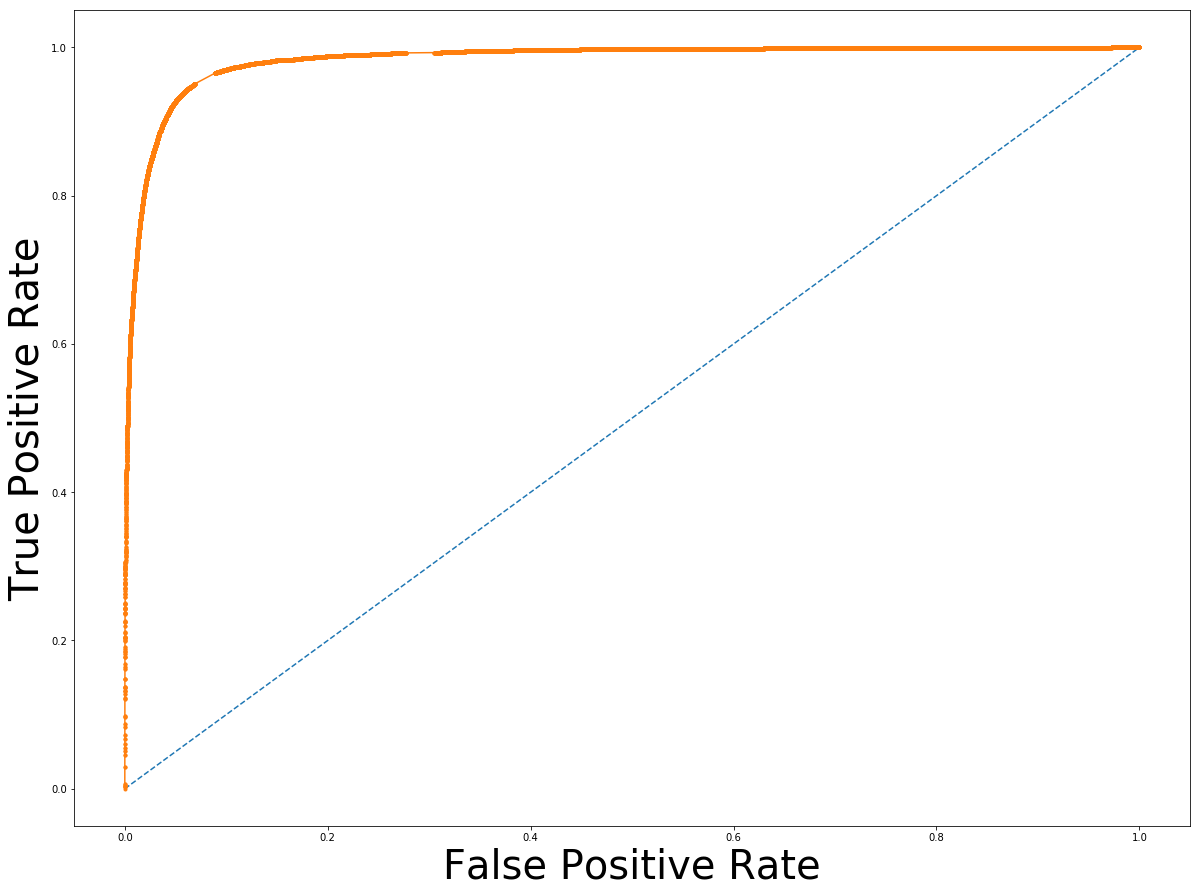

In [3]:
pid_ep.nn_model('ss')
pid_ep.predict()
pid_ep.roc_auc()
fig,ax = plt.subplots(figsize=(20,15))
pid_ep.roc_curve()
print(pid_ep.lr_auc)
print(pid_ep.accuracy)
fig.savefig('nn_first_pass.pdf')

In [ ]:
pid_ep.bdt_model('ss')
pid_ep.predict()
pid_ep.roc_auc()
fig,ax = plt.subplots(figsize=(20,15))
pid_ep.roc_curve()
print(pid_ep.lr_auc)
print(pid_ep.accuracy)
fig.savefig('bdt_first_pass.pdf')

In [ ]:
pid_ep.svm_model('ss')
pid_ep.predict()
pid_ep.roc_auc()
fig,ax = plt.subplots(figsize=(20,15))
pid_ep.roc_curve()
print(pid_ep.lr_auc)
print(pid_ep.accuracy)
fig.savefig('svm_first_pass.pdf')

In [4]:
pid_ep.k_fold_cv(10)
for train,test in pid_ep.pid_k_fold_split:
    pid_ep.nn_model_cv(train,test)

0.9632424835003667
0.9633341481300416
0.9621425079442679
0.9621730628208262
0.962356392080176
0.9616841847958935
0.9641896846736739
0.9629052464326091
0.9629663580529838
0.9632413603446696


In [ ]:
pid_ep.leave_one_out_cv()
for train,test in pid_ep.pid_leave_one_out_split:
    pid_ep.nn_model_cv(train,test)